# Temel İstatistik Kavramları

### Q1
numpy kütüphanesini kullanarak üreteceğiniz 3 farklı veri aracılığı ile merkezi eğilim ve dağılım ölçümlerini hem yukarıda verilen matematiksel formülle hem de python'da hazır bulunan (built-in) kodlar aracılığıyla analiz edin!!!

Histograms of data:



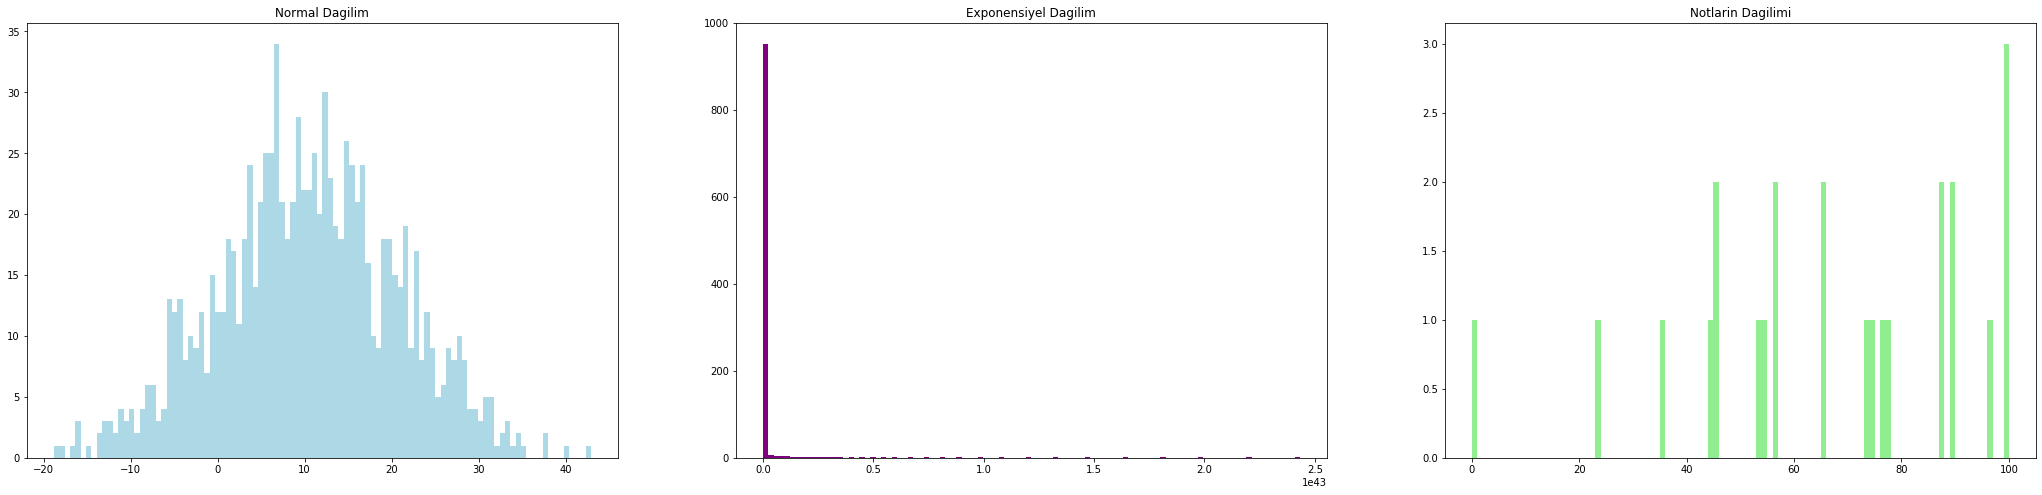



Results:



,Mean,Median,Mode,Variance,Standard Deviation,Standard Error,Manual Variance,Manual Std Devi,Manual Std Err
Variable Type,,,,,,,,,
Normal Distribution,1.042090e+01,1.046983e+01,NaN,1.057269e+02,1.028236e+01,3.251567e-01,1.057269e+02,1.028236e+01,3.251567e-01
Exponential Distribution,2.555951e+41,4.938011e+21,NaN,3.201596e+84,1.789300e+42,5.658265e+40,3.201596e+84,1.789300e+42,5.658265e+40
Grades,6.612500e+01,6.900000e+01,45.0,6.762880e+02,2.600554e+01,5.308358e+00,6.762880e+02,2.600554e+01,5.308358e+00


In [32]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')   

# mode calculation without error for multiple modes
def calcMode(arr):
    # unique values and counts of them, np.unique returns two array
    (values, counts) = np.unique(arr, return_counts=True)
    # get the index of most frquent value 
    ind = np.argmax(counts)
    # retrieve the most frequent element
    return values[ind]

def calcVariance(arr):
    mean = sum(arr)/len(arr)
    return sum([(i - mean)**2 for i in arr]) / (len(arr)-1)

def calcStdDev(arr):
    return math.sqrt(calcVariance(arr))
    
def calcStdErr(arr):
    return calcStdDev(arr) / math.sqrt(len(arr))
    
    
# create normal, exponential and grade arrays
normal = np.random.normal(10, 10, 1000)
expo = np.exp(np.arange(0,100,0.1))
grades = np.array([23,35,56,65,89,76,65,99,45,56,73,74,45,54,44,77,87,89,87,96,99,100,0,53])

# store the results in a dataframe
df = pd.DataFrame()

df['Mean'] = [np.mean(normal), np.mean(expo), np.mean(grades)]
df['Median'] = [np.median(normal), np.median(expo), np.median(grades)]
# normal and exponenetial distributions has unique values so have no modes
df['Mode'] = [np.NaN, np.NaN, calcMode(grades)]
df['Variance'] = [np.var(normal, ddof=1), np.var(expo, ddof=1), np.var(grades, ddof=1)]
df['Standard Deviation'] = [np.std(normal, ddof=1), np.std(expo, ddof=1), np.std(grades, ddof=1)]
df['Standard Error'] = [ np.std(normal, ddof=1) / np.sqrt(len(normal)),
                        np.std(expo, ddof=1) / np.sqrt(len(expo)),
                        np.std(grades, ddof=1) / np.sqrt(len(grades))]

df['Manual Variance'] = [calcVariance(normal), calcVariance(expo), calcVariance(grades)]
df['Manual Std Devi'] = [calcStdDev(normal), calcStdDev(expo), calcStdDev(grades)]
df['Manual Std Err'] = [calcStdErr(normal), calcStdErr(expo), calcStdErr(grades)]
df.index = ['Normal Distribution','Exponential Distribution','Grades']
df.index.name = 'Variable Type'



print('Histograms of data:\n')
plt.figure(figsize=(36,8))
plt.subplot(131)
plt.hist(normal, bins=100, color='lightblue')
plt.title('Normal Dagilim')
plt.subplot(132)
plt.hist(expo, bins=100, color='purple')
plt.title('Exponensiyel Dagilim')
plt.subplot(133)
plt.hist(grades, bins=100, color='lightgreen')
plt.title('Notlarin Dagilimi')

plt.show()

print('\n\nResults:\n')
df